# Unimodal Benchmark Functions (F1 - F7)

In [2]:
import numpy as np

# Define Unimodal Benchmark Functions (F1 - F7)
def sphere_function(solution):  # F1
    return np.sum(solution ** 2)

def schwefel_2_22(solution):  # F2
    return np.sum(np.abs(solution)) + np.prod(np.abs(solution))

def schwefel_1_2(solution):  # F3
    return np.sum([np.sum(solution[:i])**2 for i in range(1, len(solution) + 1)])

def schwefel_2_21(solution):  # F4
    return np.max(np.abs(solution))

def rosenbrock_function(solution):  # F5
    return np.sum(100 * (solution[1:] - solution[:-1]**2)**2 + (1 - solution[:-1])**2)

def step_function(solution):  # F6
    return np.sum(np.floor(solution + 0.5)**2)

def quartic_function(solution):  # F7
    return np.sum([(i+1) * solution[i]**4 for i in range(len(solution))]) + np.random.uniform(0, 1)

# Wrapper function to select the benchmark
def fitness_function(solution, func_type="sphere"):
    functions = {
        "sphere": sphere_function,
        "schwefel_2_22": schwefel_2_22,
        "schwefel_1_2": schwefel_1_2,
        "schwefel_2_21": schwefel_2_21,
        "rosenbrock": rosenbrock_function,
        "step": step_function,
        "quartic": quartic_function
    }
    return -functions[func_type](solution)  # Minimize the function

#===========================================================================================

import numpy as np

# Define Unimodal Benchmark Functions (F1 - F7)
def sphere_function(solution):  # F1
    return np.sum(solution ** 2)

def schwefel_2_22(solution):  # F2
    return np.sum(np.abs(solution)) + np.prod(np.abs(solution))

def schwefel_1_2(solution):  # F3
    return np.sum([np.sum(solution[:i])**2 for i in range(1, len(solution) + 1)])

def schwefel_2_21(solution):  # F4
    return np.max(np.abs(solution))

def rosenbrock_function(solution):  # F5
    return np.sum(100 * (solution[1:] - solution[:-1]**2)**2 + (1 - solution[:-1])**2)

def step_function(solution):  # F6
    return np.sum(np.floor(solution + 0.5)**2)

def quartic_function(solution):  # F7
    return np.sum([(i+1) * solution[i]**4 for i in range(len(solution))]) + np.random.uniform(0, 1)

# Wrapper function to select the benchmark
def fitness_function(solution, func_type="sphere"):
    functions = {
        "sphere": sphere_function,
        "schwefel_2_22": schwefel_2_22,
        "schwefel_1_2": schwefel_1_2,
        "schwefel_2_21": schwefel_2_21,
        "rosenbrock": rosenbrock_function,
        "step": step_function,
        "quartic": quartic_function
    }
    return -functions[func_type](solution)  # Minimize the function

#===========================================================================================


import numpy as np

class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="sphere", alpha=0.5, beta=0.1, gamma=0.5):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha  # Concession factor
        self.beta = beta    # Innovation factor
        self.gamma = gamma  # Collaboration weight
        self.function = function  # Selected benchmark function
        
        # Initialize agents randomly
        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])
        
        # Track best solution
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)

        # Convergence tracking
        self.prev_best_fitness = self.best_fitness  # Store previous best for stagnation detection
        self.stagnation_count = 0  # Count how long fitness hasn't improved

    def update_agents(self, iteration):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]  # Best 50% agents

        for i in range(self.num_agents):
            # Concession: Move towards better solutions (increase step size dynamically)
            for top_agent in top_agents:
                self.agents[i] += self.alpha * np.random.random() * (top_agent - self.agents[i])
            
            # Innovation: Add noise for exploration (reduce randomness over time)
            self.agents[i] += (self.beta / (iteration + 1)) * np.random.uniform(-1, 1, self.dim)
            
            # Collaboration: Mix solutions from best agents
            partner_index = np.random.choice(len(top_agents))
            self.agents[i] = (self.gamma * self.agents[i] + (1 - self.gamma) * top_agents[partner_index])

            # Ensure solutions stay within bounds
            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents(iteration)  # Pass iteration number for adaptive updates

            # Evaluate fitness
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])
            
            # Update best solution
            current_best_fitness = np.max(self.fitness)
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]
                self.stagnation_count = 0  # Reset stagnation counter
            else:
                self.stagnation_count += 1  # Increment if no improvement

            # Adaptive Learning: Adjust α dynamically based on progress
            if iteration % 10 == 0:  
                if abs(self.best_fitness - self.prev_best_fitness) < 0.01:
                    self.alpha *= 1.1  # Increase α if improvement is too slow
                else:
                    self.alpha *= 0.9  # Reduce α if changes are too drastic

            self.prev_best_fitness = self.best_fitness  # Update previous fitness

            # Stagnation Handling: Restart search if stuck for too long
            if self.stagnation_count > 10:
                print(f"Restarting search at iteration {iteration + 1} due to stagnation!")
                self.agents = np.random.uniform(self.bounds[0], self.bounds[1], (self.num_agents, self.dim))
                self.stagnation_count = 0  # Reset counter

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness


#===========================================================================================

if __name__ == "__main__":
    num_agents = 100
    dim = 5
    bounds = (-10, 10)
    max_iter = 50

    for func in ["sphere", "schwefel_2_22", "schwefel_1_2", "schwefel_2_21", "rosenbrock", "step", "quartic"]:
        print(f"\nRunning optimization on {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")


Running optimization on sphere function...
Iteration 1/50, Best Fitness: -5.1113545539884075
Iteration 2/50, Best Fitness: -0.5405302979492779
Iteration 3/50, Best Fitness: -0.35290529320881014
Iteration 4/50, Best Fitness: -0.35290529320881014
Iteration 5/50, Best Fitness: -0.35290529320881014
Iteration 6/50, Best Fitness: -0.35290529320881014
Iteration 7/50, Best Fitness: -0.35290529320881014
Iteration 8/50, Best Fitness: -0.35290529320881014
Iteration 9/50, Best Fitness: -0.35290529320881014
Iteration 10/50, Best Fitness: -0.35290529320881014
Iteration 11/50, Best Fitness: -0.35290529320881014
Iteration 12/50, Best Fitness: -0.35290529320881014
Iteration 13/50, Best Fitness: -0.35290529320881014
Restarting search at iteration 14 due to stagnation!
Iteration 14/50, Best Fitness: -0.35290529320881014
Iteration 15/50, Best Fitness: -0.35290529320881014
Iteration 16/50, Best Fitness: -0.35290529320881014
Iteration 17/50, Best Fitness: -0.35290529320881014
Iteration 18/50, Best Fitness:

# Applying Multimodal Benchmark Functions (F8 - F13)

In [3]:
import numpy as np

# Define Multimodal Benchmark Functions
def rastrigin_function(solution):  # F8
    return 10 * len(solution) + np.sum(solution ** 2 - 10 * np.cos(2 * np.pi * solution))

def ackley_function(solution):  # F9
    d = len(solution)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(solution**2) / d)) - \
           np.exp(np.sum(np.cos(2 * np.pi * solution)) / d) + 20 + np.e

def griewank_function(solution):  # F10
    d = len(solution)
    sum_term = np.sum(solution ** 2) / 4000
    prod_term = np.prod(np.cos(solution / np.sqrt(np.arange(1, d + 1))))
    return sum_term - prod_term + 1

def levy_function(solution):  # F11
    w = 1 + (solution - 1) / 4
    term1 = np.sin(np.pi * w[0]) ** 2
    term2 = np.sum((w[:-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1) ** 2))
    term3 = (w[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[-1]) ** 2)
    return term1 + term2 + term3

def zakharov_function(solution):  # F12
    term1 = np.sum(solution ** 2)
    term2 = np.sum(0.5 * np.arange(1, len(solution) + 1) * solution) ** 2
    term3 = np.sum(0.5 * np.arange(1, len(solution) + 1) * solution) ** 4
    return term1 + term2 + term3

def alpine_function(solution):  # F13
    return np.sum(np.abs(solution * np.sin(solution) + 0.1 * solution))

# Benchmark function selector
def fitness_function(solution, func_type="rastrigin"):
    functions = {
        "rastrigin": rastrigin_function,
        "ackley": ackley_function,
        "griewank": griewank_function,
        "levy": levy_function,
        "zakharov": zakharov_function,
        "alpine": alpine_function
    }
    return -functions[func_type](solution)  # Minimization problem
#========================================================================================= = = = = = = =
class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="rastrigin", alpha=0.5, beta=0.1, gamma=0.5):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha  # Concession factor
        self.beta = beta  # Innovation factor
        self.gamma = gamma  # Collaboration weight
        self.function = function  # Benchmark function selection

        # Initialize agents
        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])

        # Track best solution
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)

    def update_agents(self, iteration):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            # Concession: Move towards better solutions
            for top_agent in top_agents:
                self.agents[i] += self.alpha * np.random.random() * (top_agent - self.agents[i])

            # Innovation: Add noise for exploration
            self.agents[i] += (self.beta / (iteration + 1)) * np.random.uniform(-1, 1, self.dim)

            # Collaboration: Mix solutions
            partner_index = np.random.choice(len(top_agents))
            self.agents[i] = (self.gamma * self.agents[i] + (1 - self.gamma) * top_agents[partner_index])

            # Ensure bounds
            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents(iteration)
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])

            current_best_fitness = np.max(self.fitness)
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness
#=======================================================================================================
if __name__ == "__main__":
    num_agents = 50
    dim = 5
    bounds = (-10, 10)
    max_iter = 100  # More iterations for multimodal problems

    for func in ["rastrigin", "ackley", "griewank", "levy", "zakharov", "alpine"]:
        print(f"\nRunning optimization on {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")




Running optimization on rastrigin function...
Iteration 1/100, Best Fitness: -42.9199389290324
Iteration 2/100, Best Fitness: -42.9199389290324
Iteration 3/100, Best Fitness: -37.44995249000878
Iteration 4/100, Best Fitness: -37.44995249000878
Iteration 5/100, Best Fitness: -37.44995249000878
Iteration 6/100, Best Fitness: -37.44995249000878
Iteration 7/100, Best Fitness: -37.44995249000878
Iteration 8/100, Best Fitness: -37.44995249000878
Iteration 9/100, Best Fitness: -37.44995249000878
Iteration 10/100, Best Fitness: -37.44995249000878
Iteration 11/100, Best Fitness: -37.44995249000878
Iteration 12/100, Best Fitness: -37.44995249000878
Iteration 13/100, Best Fitness: -37.44995249000878
Iteration 14/100, Best Fitness: -37.44995249000878
Iteration 15/100, Best Fitness: -37.44995249000878
Iteration 16/100, Best Fitness: -37.44995249000878
Iteration 17/100, Best Fitness: -37.44995249000878
Iteration 18/100, Best Fitness: -37.44995249000878
Iteration 19/100, Best Fitness: -37.4499524900

# Applying Fixed-Dimension Multimodal Functions (F14 - F23)

In [4]:
import numpy as np

# Define Benchmark Functions
def step2_function(solution):  # F14
    return 1 + np.sum(np.floor(solution))

def schwefel_function(solution):  # F15
    return 418.9829 * len(solution) - np.sum(solution * np.sin(np.sqrt(np.abs(solution))))

def michalewicz_function(solution, m=10):  # F16
    return -np.sum(np.sin(solution) * (np.sin((np.arange(1, len(solution) + 1) * solution ** 2) / np.pi)) ** (2 * m))

def bent_cigar_function(solution):  # F17
    return solution[0] ** 2 + 10 ** 6 * np.sum(solution[1:] ** 2)

def hgbat_function(solution):  # F18
    d = len(solution)
    return np.abs(np.sum(solution ** 2) - d) ** 0.5 + (0.5 / d) * np.sum(solution)

def sum_squares_function(solution):  # F19
    return np.sum((np.arange(1, len(solution) + 1) * solution ** 2))

def qing_function(solution):  # F20
    return np.sum((solution ** 2 - np.arange(1, len(solution) + 1)) ** 2)

def cosine_mixture_function(solution):  # F21
    return -0.1 * np.sum(np.cos(5 * np.pi * solution)) - np.sum(solution ** 2)

def schaffer_f6_function(solution):  # F22
    return np.sum(0.5 + (np.sin(np.sqrt(solution[:-1] ** 2 + solution[1:] ** 2)) ** 2 - 0.5) /
                  (1 + 0.001 * (solution[:-1] ** 2 + solution[1:] ** 2)) ** 2)

def expanded_griewank_rosenbrock_function(solution):  # F23
    return np.sum(100 * (solution[1:] - solution[:-1] ** 2) ** 2 + (1 - solution[:-1]) ** 2) + \
           np.sum(solution ** 2 / 4000) - np.prod(np.cos(solution / np.sqrt(np.arange(1, len(solution) + 1)))) + 1

# Benchmark function selector
def fitness_function(solution, func_type="step2"):
    functions = {
        "step2": step2_function,
        "schwefel": schwefel_function,
        "michalewicz": michalewicz_function,
        "bent_cigar": bent_cigar_function,
        "hgbat": hgbat_function,
        "sum_squares": sum_squares_function,
        "qing": qing_function,
        "cosine_mixture": cosine_mixture_function,
        "schaffer_f6": schaffer_f6_function,
        "expanded_griewank_rosenbrock": expanded_griewank_rosenbrock_function
    }
    return -functions[func_type](solution)

#============================================================================================================
class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="step2", alpha=0.2, beta=0.1, gamma=0.5):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha  # Concession factor
        self.beta = beta  # Innovation factor
        self.gamma = gamma  # Collaboration weight
        self.function = function  # Benchmark function selection

        # Initialize agents
        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])

        # Track best solution
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)

    def update_agents(self, iteration):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            # Concession: Move towards better solutions
            for top_agent in top_agents:
                self.agents[i] += self.alpha * np.random.random() * (top_agent - self.agents[i])

            # Innovation: Add noise for exploration
            self.agents[i] += (self.beta / (iteration + 1)) * np.random.uniform(-1, 1, self.dim)

            # Collaboration: Mix solutions
            partner_index = np.random.choice(len(top_agents))
            self.agents[i] = (self.gamma * self.agents[i] + (1 - self.gamma) * top_agents[partner_index])


            # Ensure bounds
            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents(iteration)
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])

            current_best_fitness = np.max(self.fitness)
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness
#=======================================================================================================
if __name__ == "__main__":
    num_agents = 5
    dim = 8
    bounds = (-10, 10)
    max_iter = 100  # More iterations for multimodal problems

    for func in ["step2", "schwefel", "michalewicz", "bent_cigar", "hgbat", "sum_squares", "qing", "cosine_mixture", "schaffer_f6", "expanded_griewank_rosenbrock" ]:
        print(f"\nRunning optimization on {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")

 


Running optimization on step2 function...
Iteration 1/100, Best Fitness: 30.0
Iteration 2/100, Best Fitness: 30.0
Iteration 3/100, Best Fitness: 30.0
Iteration 4/100, Best Fitness: 30.0
Iteration 5/100, Best Fitness: 30.0
Iteration 6/100, Best Fitness: 30.0
Iteration 7/100, Best Fitness: 30.0
Iteration 8/100, Best Fitness: 30.0
Iteration 9/100, Best Fitness: 30.0
Iteration 10/100, Best Fitness: 30.0
Iteration 11/100, Best Fitness: 30.0
Iteration 12/100, Best Fitness: 30.0
Iteration 13/100, Best Fitness: 30.0
Iteration 14/100, Best Fitness: 30.0
Iteration 15/100, Best Fitness: 30.0
Iteration 16/100, Best Fitness: 30.0
Iteration 17/100, Best Fitness: 30.0
Iteration 18/100, Best Fitness: 30.0
Iteration 19/100, Best Fitness: 30.0
Iteration 20/100, Best Fitness: 30.0
Iteration 21/100, Best Fitness: 30.0
Iteration 22/100, Best Fitness: 30.0
Iteration 23/100, Best Fitness: 30.0
Iteration 24/100, Best Fitness: 30.0
Iteration 25/100, Best Fitness: 30.0
Iteration 26/100, Best Fitness: 30.0
Iter

# Fixed-Dimension Multimodal Benchmark Functions ( F14 - F18)

In [6]:
import numpy as np

# Define the new Fixed-Dimension Multimodal Benchmark Functions
def schwefel_function(solution):  # F14
    d = len(solution)
    return 418.9829 * d - np.sum(solution * np.sin(np.sqrt(np.abs(solution))))

def bent_cigar_function(solution):  # F15
    return solution[0]**2 + 10**6 * np.sum(solution[1:]**2)

def hgbat_function(solution):  # F16
    d = len(solution)
    term1 = np.abs(np.sum(solution**2) - d) ** 0.5
    term2 = 0.5 * np.sum(solution)
    return term1 + term2 + 0.5

def sum_squares_function(solution):  # F17
    return np.sum((np.arange(1, len(solution) + 1)) * solution**2)

def qing_function(solution):  # F18
    indices = np.arange(1, len(solution) + 1)
    return np.sum((solution**2 - indices)**2)

# Wrapper function to select the benchmark
def fitness_function(solution, function="schwefel"):
    functions = {
        "schwefel": schwefel_function,
        "bent_cigar": bent_cigar_function,
        "hgbat": hgbat_function,
        "sum_squares": sum_squares_function,
        "qing": qing_function
    }
    return -functions[function](solution)  # Minimize the function



# =====================================================================================

class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="schwefel", alpha=0.6, beta=0.2, gamma=0.4):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function = function

        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)

    def update_agents(self):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            partner = np.random.choice(len(top_agents))
            self.agents[i] += self.alpha * (top_agents[partner] - self.agents[i])

            self.agents[i] += self.beta * np.random.uniform(-1, 1, self.dim)

            # Adaptive Learning: If an agent is stuck, restart it randomly
            if np.random.rand() < 0.1:
                self.agents[i] = np.random.uniform(self.bounds[0], self.bounds[1], self.dim)

            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents()
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])
            current_best_fitness = np.max(self.fitness)

            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness
# =============================================== ================= ====================

if __name__ == "__main__":
    num_agents = 20
    dim = 5
    bounds = (-10, 10)
    max_iter = 50

    for func in ["schwefel", "bent_cigar", "hgbat", "sum_squares", "qing"]:
        print(f"\nOptimizing {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")



Optimizing schwefel function...
Iteration 1/50, Best Fitness: -2080.8281057030063
Iteration 2/50, Best Fitness: -2080.8281057030063
Iteration 3/50, Best Fitness: -2080.8281057030063
Iteration 4/50, Best Fitness: -2080.8281057030063
Iteration 5/50, Best Fitness: -2080.8281057030063
Iteration 6/50, Best Fitness: -2080.8281057030063
Iteration 7/50, Best Fitness: -2080.8281057030063
Iteration 8/50, Best Fitness: -2080.8281057030063
Iteration 9/50, Best Fitness: -2080.8281057030063
Iteration 10/50, Best Fitness: -2080.8281057030063
Iteration 11/50, Best Fitness: -2080.8281057030063
Iteration 12/50, Best Fitness: -2080.8281057030063
Iteration 13/50, Best Fitness: -2080.8281057030063
Iteration 14/50, Best Fitness: -2080.8281057030063
Iteration 15/50, Best Fitness: -2080.8281057030063
Iteration 16/50, Best Fitness: -2080.8281057030063
Iteration 17/50, Best Fitness: -2080.8281057030063
Iteration 18/50, Best Fitness: -2080.134909349431
Iteration 19/50, Best Fitness: -2080.134909349431
Iteration

# Fixed-Dimension Multimodal Benchmark Functions

In [7]:
import numpy as np

# Define Fixed-Dimension Multimodal Benchmark Functions
def step_2_function(solution):  # F14
    return np.sum(np.floor(solution))

def alpine_function(solution):  # F15
    return np.sum(np.abs(solution * np.sin(solution) + 0.1 * solution))

def michalewicz_function(solution):  # F16
    m = 10
    return -np.sum(np.sin(solution) * (np.sin(((np.arange(1, len(solution) + 1) * solution**2) / np.pi)))**(2 * m))

def levy_function(solution):  # F17
    w = 1 + (solution - 1) / 4
    term1 = np.sin(np.pi * w[0]) ** 2
    term2 = np.sum((w[:-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1) ** 2))
    term3 = (w[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[-1]) ** 2)
    return term1 + term2 + term3

def zakharov_function(solution):  # F18
    term1 = np.sum(solution**2)
    term2 = np.sum(0.5 * np.arange(1, len(solution) + 1) * solution)
    return term1 + term2**2 + term2**4

def fitness_function(solution, function="step_2"):
    functions = {
        "step_2": step_2_function,
        "alpine": alpine_function,
        "michalewicz": michalewicz_function,
        "levy": levy_function,
        "zakharov": zakharov_function
    }
    return -functions[function](solution)  # Minimize function

# New Optimizer Class
class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="step_2", alpha=0.6, beta=0.2, gamma=0.4):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function = function
        
        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)

    def update_agents(self):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            if np.random.rand() < 0.5:
                partner = np.random.choice(len(top_agents))
                self.agents[i] += self.alpha * (top_agents[partner] - self.agents[i])

            self.agents[i] += self.beta * np.random.uniform(-1, 1, self.dim)

            if np.random.rand() < 0.1:
                self.agents[i] = np.random.uniform(self.bounds[0], self.bounds[1], self.dim)

            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents()
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])
            current_best_fitness = np.max(self.fitness)

            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness

# Run Optimization on Fixed-Dimension Multimodal Functions
if __name__ == "__main__":
    num_agents = 20
    dim = 5
    bounds = (-10, 10)
    max_iter = 50

    for func in ["step_2", "alpine", "michalewicz", "levy", "zakharov"]:
        print(f"\nOptimizing {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")



Optimizing step_2 function...
Iteration 1/50, Best Fitness: 16.0
Iteration 2/50, Best Fitness: 21.0
Iteration 3/50, Best Fitness: 21.0
Iteration 4/50, Best Fitness: 29.0
Iteration 5/50, Best Fitness: 29.0
Iteration 6/50, Best Fitness: 29.0
Iteration 7/50, Best Fitness: 29.0
Iteration 8/50, Best Fitness: 29.0
Iteration 9/50, Best Fitness: 29.0
Iteration 10/50, Best Fitness: 29.0
Iteration 11/50, Best Fitness: 29.0
Iteration 12/50, Best Fitness: 29.0
Iteration 13/50, Best Fitness: 29.0
Iteration 14/50, Best Fitness: 29.0
Iteration 15/50, Best Fitness: 29.0
Iteration 16/50, Best Fitness: 29.0
Iteration 17/50, Best Fitness: 29.0
Iteration 18/50, Best Fitness: 29.0
Iteration 19/50, Best Fitness: 29.0
Iteration 20/50, Best Fitness: 29.0
Iteration 21/50, Best Fitness: 29.0
Iteration 22/50, Best Fitness: 29.0
Iteration 23/50, Best Fitness: 29.0
Iteration 24/50, Best Fitness: 29.0
Iteration 25/50, Best Fitness: 29.0
Iteration 26/50, Best Fitness: 29.0
Iteration 27/50, Best Fitness: 29.0
Iterat

# Composite Functions (F24 - F29)

In [8]:
import numpy as np

# Define the Composite Benchmark Functions
def hybrid_composition_1(solution):  # F24
    weights = np.linspace(0.1, 1.0, len(solution))
    return np.sum(weights * (solution**2))

def hybrid_composition_2(solution):  # F25
    shift = np.random.uniform(-5, 5, len(solution))
    return np.sum((solution - shift)**2)

def rotated_hybrid_function(solution):  # F26
    rotation_matrix = np.random.randn(len(solution), len(solution))
    rotated_solution = np.dot(rotation_matrix, solution)
    return np.sum(rotated_solution**2)

def expanded_hybrid_function(solution):  # F27
    return np.sum(solution**4 - 16*solution**2 + 5*solution)

def composition_function(solution):  # F28
    return np.sum(np.sin(solution) + np.abs(solution)**0.5)

def composition_function_with_rotation(solution):  # F29
    rotation_matrix = np.random.randn(len(solution), len(solution))
    rotated_solution = np.dot(rotation_matrix, solution)
    return np.sum(np.cos(rotated_solution) + rotated_solution**2)

# Wrapper function to select the benchmark
def fitness_function(solution, function="hybrid_composition_1"):
    functions = {
        "hybrid_composition_1": hybrid_composition_1,
        "hybrid_composition_2": hybrid_composition_2,
        "rotated_hybrid_function": rotated_hybrid_function,
        "expanded_hybrid_function": expanded_hybrid_function,
        "composition_function": composition_function,
        "composition_function_with_rotation": composition_function_with_rotation
    }
    return -functions[function](solution)  # Minimize the function
class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="hybrid_composition_1", alpha=0.6, beta=0.2, gamma=0.4):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function = function

        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)
        self.history = []  # Store best solutions

    def update_agents(self):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            partner = np.random.choice(len(top_agents))
            self.agents[i] += self.alpha * (top_agents[partner] - self.agents[i])

            # Perturbation: Add random variation to escape local optima
            self.agents[i] += self.beta * np.random.uniform(-1, 1, self.dim)

            # Memory Learning: Replace poor agents with previous best solutions
            if len(self.history) > 0 and np.random.rand() < 0.1:
                self.agents[i] = self.history[np.random.randint(0, len(self.history))]

            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents()
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])
            current_best_fitness = np.max(self.fitness)

            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]
                self.history.append(self.best_agent)  # Save to history

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness
#====================================================
if __name__ == "__main__":
    num_agents = 20
    dim = 5
    bounds = (-10, 10)
    max_iter = 50

    for func in ["hybrid_composition_1", "hybrid_composition_2", "rotated_hybrid_function", 
                 "expanded_hybrid_function", "composition_function", "composition_function_with_rotation"]:
        print(f"\nOptimizing {func} function...")
        optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=func)
        best_solution, best_fitness = optimizer.optimize()
        print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")



Optimizing hybrid_composition_1 function...
Iteration 1/50, Best Fitness: -4.473065325784716
Iteration 2/50, Best Fitness: -4.473065325784716
Iteration 3/50, Best Fitness: -1.3422312682016277
Iteration 4/50, Best Fitness: -1.3422312682016277
Iteration 5/50, Best Fitness: -1.136768318763139
Iteration 6/50, Best Fitness: -1.136768318763139
Iteration 7/50, Best Fitness: -1.136768318763139
Iteration 8/50, Best Fitness: -1.0599151655116543
Iteration 9/50, Best Fitness: -1.0599151655116543
Iteration 10/50, Best Fitness: -0.9928383729909351
Iteration 11/50, Best Fitness: -0.8034081961176924
Iteration 12/50, Best Fitness: -0.731747031516355
Iteration 13/50, Best Fitness: -0.5992292076437402
Iteration 14/50, Best Fitness: -0.5992292076437402
Iteration 15/50, Best Fitness: -0.4577156952362364
Iteration 16/50, Best Fitness: -0.4440247888137333
Iteration 17/50, Best Fitness: -0.3960540971850603
Iteration 18/50, Best Fitness: -0.38139121061113046
Iteration 19/50, Best Fitness: -0.25982272613860175

# Convergence behavior analysis

Iteration 1/50, Best Fitness: -5.0433157069799
Iteration 2/50, Best Fitness: -2.4292145167434063
Iteration 3/50, Best Fitness: -2.4292145167434063
Iteration 4/50, Best Fitness: -2.4292145167434063
Iteration 5/50, Best Fitness: -2.4292145167434063
Iteration 6/50, Best Fitness: -2.4292145167434063
Iteration 7/50, Best Fitness: -2.2419293179474145
Iteration 8/50, Best Fitness: -2.162648800261227
Iteration 9/50, Best Fitness: -2.162648800261227
Iteration 10/50, Best Fitness: -2.0650370094878836
Iteration 11/50, Best Fitness: -1.9920977346881035
Iteration 12/50, Best Fitness: -1.9353042663544593
Iteration 13/50, Best Fitness: -1.7001887400924027
Iteration 14/50, Best Fitness: -1.7001887400924027
Iteration 15/50, Best Fitness: -1.6111167295620459
Iteration 16/50, Best Fitness: -1.6029470522443654
Iteration 17/50, Best Fitness: -1.5699517985316453
Iteration 18/50, Best Fitness: -1.380574123548779
Iteration 19/50, Best Fitness: -0.9650805221581032
Iteration 20/50, Best Fitness: -0.801451773216

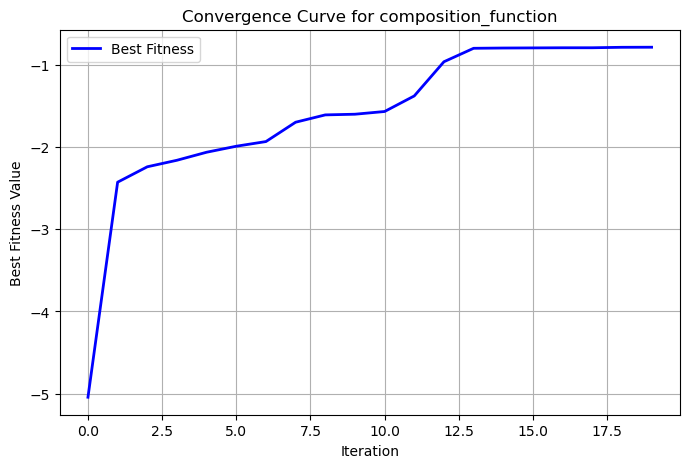

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class NegotiationOptimizer:
    def __init__(self, num_agents, dim, bounds, max_iter, function="hybrid_composition_1", alpha=0.6, beta=0.2, gamma=0.4):
        self.num_agents = num_agents
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function = function

        self.agents = np.random.uniform(bounds[0], bounds[1], (num_agents, dim))
        self.fitness = np.array([fitness_function(agent, function) for agent in self.agents])
        self.best_agent = self.agents[np.argmax(self.fitness)]
        self.best_fitness = np.max(self.fitness)
        self.history = []  # Store best fitness over time

    def update_agents(self):
        ranked_indices = np.argsort(self.fitness)[::-1]
        top_agents = self.agents[ranked_indices[:self.num_agents // 2]]

        for i in range(self.num_agents):
            partner = np.random.choice(len(top_agents))
            self.agents[i] += self.alpha * (top_agents[partner] - self.agents[i])

            # Perturbation: Add random variation to escape local optima
            self.agents[i] += self.beta * np.random.uniform(-1, 1, self.dim)

            # Memory Learning: Replace poor agents with previous best solutions
            if len(self.history) > 0 and np.random.rand() < 0.1:
                self.agents[i] = self.history[np.random.randint(0, len(self.history))]

            self.agents[i] = np.clip(self.agents[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_agents()
            self.fitness = np.array([fitness_function(agent, self.function) for agent in self.agents])
            current_best_fitness = np.max(self.fitness)

            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_agent = self.agents[np.argmax(self.fitness)]
                self.history.append(self.best_fitness)  # Save best fitness over iterations

            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness}")

        return self.best_agent, self.best_fitness, self.history
# =============================================================================================
def plot_convergence(history, function_name):
    plt.figure(figsize=(8, 5))
    plt.plot(history, label="Best Fitness", color="b", linewidth=2)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness Value")
    plt.title(f"Convergence Curve for {function_name}")
    plt.legend()
    plt.grid()
    plt.show()
# ===============================================================================================
if __name__ == "__main__":
    num_agents = 20
    dim = 5
    bounds = (-10, 10)
    max_iter = 50

    function_name = "composition_function"  # Change to test other functions

    optimizer = NegotiationOptimizer(num_agents, dim, bounds, max_iter, function=function_name)
    best_solution, best_fitness, history = optimizer.optimize()

    print(f"\nBest Solution: {best_solution}")
    print(f"Best Fitness: {best_fitness}")

    # Plot convergence behavior
    plot_convergence(history, function_name)
